In [2]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




Dataset Key-

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

isFlaggedFraud: Flagged fraud transaction

Data prepocessing

In [3]:
# load the dataset
df = pd.read_csv('fraud_data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Check the number of rows and columns
df.shape

(6362620, 11)

In [6]:
# Check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Check for NAN values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# Drop unnecessary columns
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [9]:
# Check for unique values in type column
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot: xlabel='type', ylabel='isFraud'>

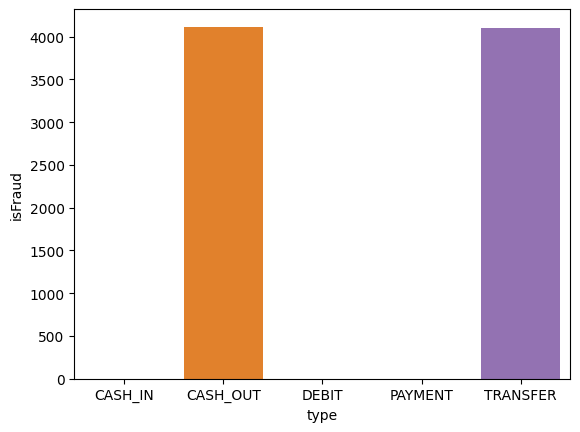

In [11]:
# Check for frequency of each type of transaction that resulted in fraud
t=pd.DataFrame(df.groupby(by=df['type'])['isFraud'].sum())
sns.barplot(data=t,x=t.index, y='isFraud')


<AxesSubplot: xlabel='type', ylabel='count'>

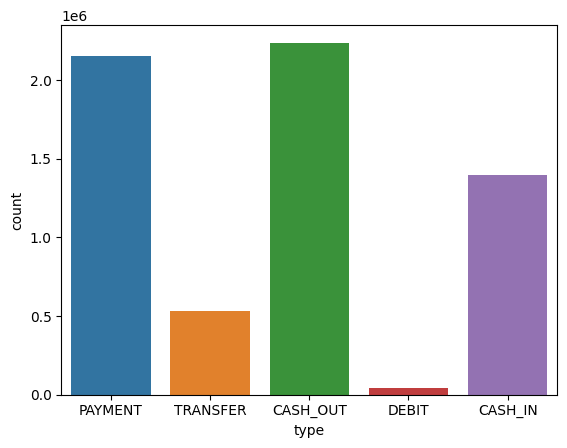

In [12]:
# Check for frequency of each type of transaction that resulted in fraud
sns.countplot(x='type', data=df)


In [13]:
# Label encode the type column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [14]:
# Check the count of each type of transaction is the same as before
df['type'].value_counts()

1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

In [15]:
# check the datatype of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 364.1 MB


In [16]:
# Check correlation with isFraud
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [17]:
# BUilding the classificaiton model
x = df.drop(['isFraud'], axis=1)
y = df['isFraud']
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


In [18]:
# Split the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Fraud percentage in Train: {:.3f}%\nFraud percentage in Test: {:.3f}%".format(
    (y_train.sum().sum()/y_train.size)*100, (y_test.sum().sum()/y_test.size)*100))


Fraud percentage in Train: 0.130%
Fraud percentage in Test: 0.127%


Fraud distribution across train/test data is level

In [19]:
# Decision Tree Classifier
modeldt = DecisionTreeClassifier()
modeldt.fit(x_train, y_train)
y_preddt = modeldt.predict(x_test)
print ("Accuracy : ", accuracy_score(y_test, y_preddt)*100)


Accuracy :  99.97108109552354


Accuracy: 0.9997108109552354
Precision: 0.897712833545108
Recall: 0.8722222222222222
F1-score: 0.8847839699436444
Confusion matrix:
 [[1270743     161]
 [    207    1413]]
AUC: 0.9360477703709765


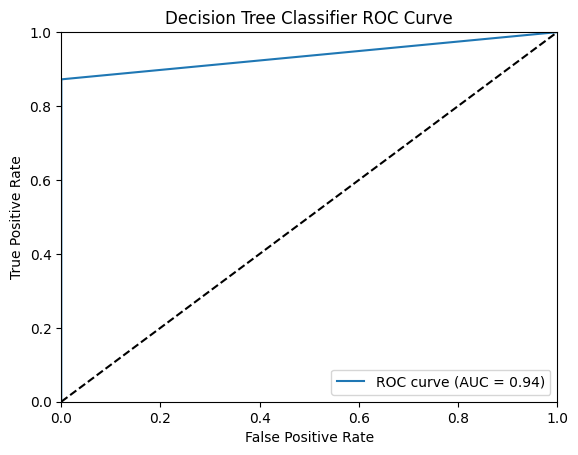

In [20]:
# Compute evaluation metrics for Decision Tree Classifier
accuracy = accuracy_score(y_test, y_preddt)
precision = precision_score(y_test, y_preddt)
recall = recall_score(y_test, y_preddt)
f1 = f1_score(y_test, y_preddt)
conf_matrix = confusion_matrix(y_test, y_preddt)
fpr, tpr, thresholds = roc_curve(y_test, y_preddt)
auc = roc_auc_score(y_test, y_preddt)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", conf_matrix)
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Random Forest Classifier
# modelrf = RandomForestClassifier()
# modelrf.fit(x_train, y_train)
# print(modelrf.score(x_test, y_test))
### took too long to run ###

In [22]:
# KNN Classifier
modelknn = KNeighborsClassifier()
modelknn.fit(x_train, y_train)
y_predknn = modelknn.predict(x_test)
print ("Accuracy : ", accuracy_score(y_test, y_predknn)*100)



Accuracy :  99.94499121431109


Accuracy: 0.9994499121431109
Precision: 0.8522205206738132
Recall: 0.687037037037037
F1-score: 0.7607655502392344
Confusion matrix:
 [[1270711     193]
 [    507    1113]]
AUC: 0.8434425883145062


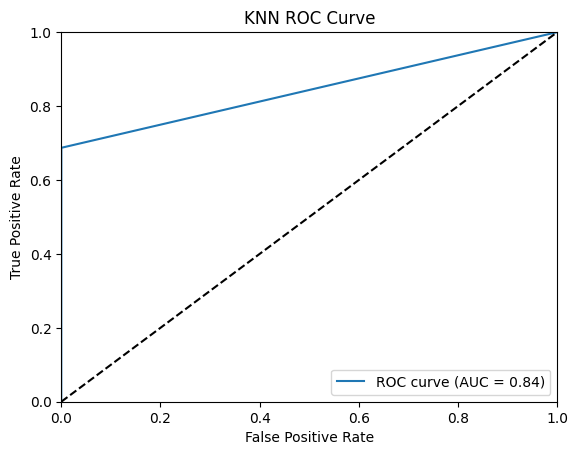

In [23]:
# Compute evaluation metrics for KNN Model
accuracy = accuracy_score(y_test, y_predknn)
precision = precision_score(y_test, y_predknn)
recall = recall_score(y_test, y_predknn)
f1 = f1_score(y_test, y_predknn)
conf_matrix = confusion_matrix(y_test, y_predknn)
fpr, tpr, thresholds = roc_curve(y_test, y_predknn)
auc = roc_auc_score(y_test, y_predknn)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", conf_matrix)
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Logistic Regression
modellog = LogisticRegression()
modellog.fit(x_train, y_train)
y_predlog = modellog.predict(x_test)
print ("Accuracy : ", accuracy_score(y_test, y_predlog)*100)


Accuracy :  99.83128019589415


Accuracy: 0.9983128019589415
Precision: 0.35916622127204706
Recall: 0.4148148148148148
F1-score: 0.3849899742194214
Confusion matrix:
 [[1269705    1199]
 [    948     672]]
AUC: 0.7069356959327405


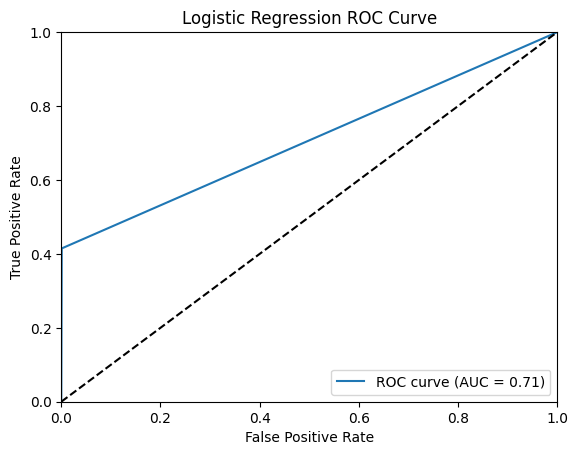

In [25]:
# Compute evaluation metrics for Logistic Regression Model
accuracy = accuracy_score(y_test, y_predlog)
precision = precision_score(y_test, y_predlog)
recall = recall_score(y_test, y_predlog)
f1 = f1_score(y_test, y_predlog)
conf_matrix = confusion_matrix(y_test, y_predlog)
fpr, tpr, thresholds = roc_curve(y_test, y_predlog)
auc = roc_auc_score(y_test, y_predlog)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", conf_matrix)
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Naive Bayes Classifier
modelnb = GaussianNB()
modelnb.fit(x_train, y_train)
y_prednb = modelnb.predict(x_test)
print ("Accuracy : ", accuracy_score(y_test, y_prednb)*100)

Accuracy :  99.30146700573034


Accuracy: 0.9930146700573035
Precision: 0.03266040889803266
Recall: 0.15679012345679014
F1-score: 0.054059806321166325
Confusion matrix:
 [[1263381    7523]
 [   1366     254]]
AUC: 0.5754353574549015


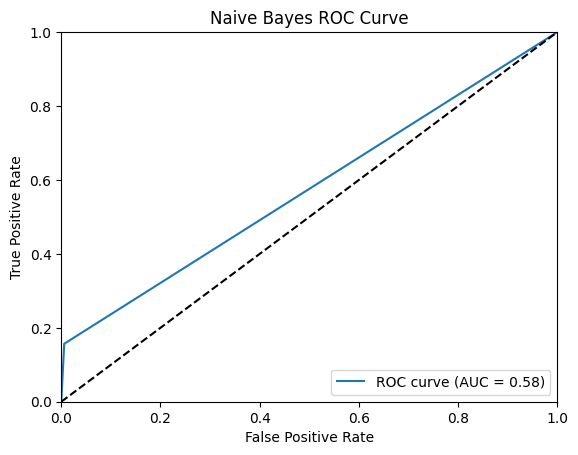

In [27]:
# Compute evaluation metrics for Logistic Regression Model
accuracy = accuracy_score(y_test, y_prednb)
precision = precision_score(y_test, y_prednb)
recall = recall_score(y_test, y_prednb)
f1 = f1_score(y_test, y_prednb)
conf_matrix = confusion_matrix(y_test, y_prednb)
fpr, tpr, thresholds = roc_curve(y_test, y_prednb)
auc = roc_auc_score(y_test, y_prednb)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", conf_matrix)
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
# MODEL TOOK TOO LONG TO RUN

# Support Vector Machine Classifier
# modelsvm = SVC()
# modelsvm.fit(x_train, y_train)
# y_predsvm = modelsvm.predict(x_test)
# print ("Accuracy : ", accuracy_score(y_test, y_predsvm)*100)
